# ILTS with random initialization

By executing the following code, we can observe that 
the superiority of ILTS remains unaffected by the choice of 
random or average initialization.

C:\Users\admin\AppData\Local\Temp\ipykernel_1708\1827010779.py:81: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


finish


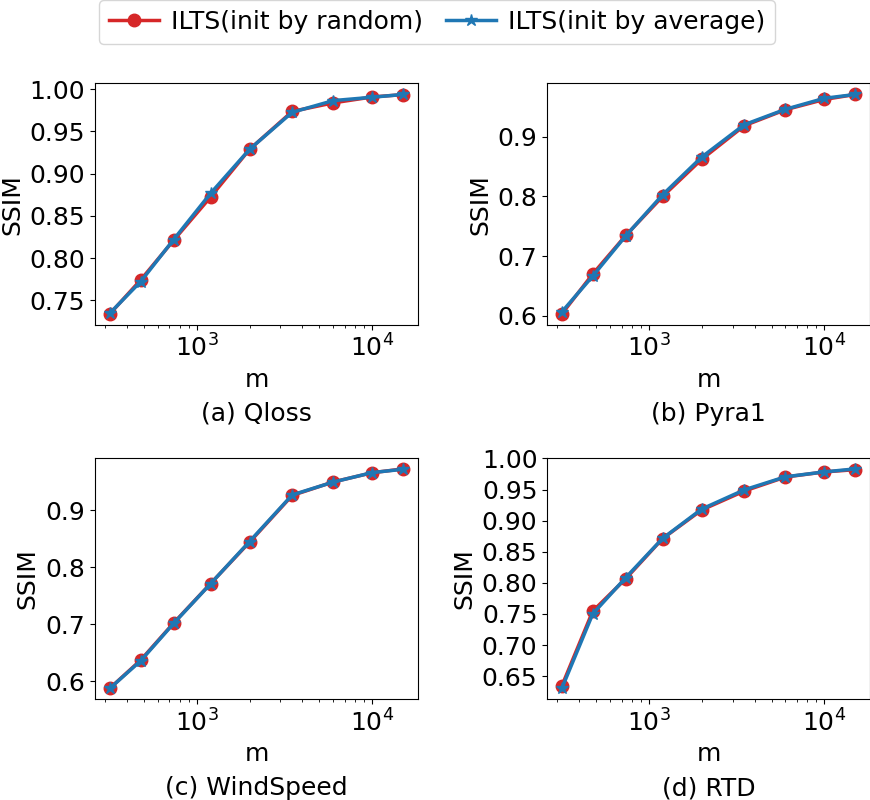

In [2]:
from myfuncs import *

fig, axs = plt.subplots(2,2,figsize=(10,8))
ax1=axs[0,0]
ax2=axs[0,1]
ax3=axs[1,0]
ax4=axs[1,1]
axes=[ax1,ax2,ax3,ax4]

titlepos=-0.43

font=18
lw=2.5
slw=1
ms=9
columnspacing=0.9
handletextpad=0.5

# Remove space between axes
fig.subplots_adjust(wspace=0.4) # hspace竖向,wspace横向
fig.subplots_adjust(hspace=0.55) # hspace竖向,wspace横向


ssimDir="./ssimResults-initRandom" 
resList=[]
resList.append(os.path.join(ssimDir,'res-Qloss.csv'))
resList.append(os.path.join(ssimDir,'res-Pyra1.csv'))
resList.append(os.path.join(ssimDir,'res-WindSpeed.csv'))
resList.append(os.path.join(ssimDir,'res-RTD.csv'))

titleList=[
    '(a) Qloss',
    '(b) Pyra1',
    '(c) WindSpeed',
    '(d) RTD'
]

for i in range(len(resList)):
    plt.sca(axes[i])
    
    col_list = ["nout",\
                "iltsRandom_n","iltsRandom_ssim",\
                "ilts_n","ilts_ssim",
           ]
    
    df=pd.read_csv(resList[i],header=0,names=col_list)
    colIdx=-1
    
    colIdx+=1
    n=df.iloc[:,colIdx]
    
    colIdx+=1
    iltsRandom_n=df.iloc[:,colIdx]
    colIdx+=1
    iltsRandom_ssim=df.iloc[:,colIdx]
    
    colIdx+=1
    ilts_n=df.iloc[:,colIdx]
    colIdx+=1
    ilts_ssim=df.iloc[:,colIdx]
    

    plt.plot(iltsRandom_n,iltsRandom_ssim,marker='o',markersize=ms,linewidth=lw,color="tab:red")
    plt.plot(ilts_n,ilts_ssim,marker='*',markersize=ms,linewidth=lw,color="tab:blue")
    
    plt.xlabel("m",fontsize=font)
    plt.ylabel("SSIM", fontsize=font)

    plt.xticks(fontsize=font)
    plt.yticks(fontsize=font)
    plt.xticks(n[0::2])

    plt.title(titleList[i],y=titlepos,fontsize=font)
    
    plt.xscale('log')
    
###############################
labels=["ILTS(init by random)","ILTS(init by average)"]
fig.legend(fontsize=font, labels=labels, ncol=3,bbox_to_anchor=(0.467,1.0), loc='upper center',\
           columnspacing=columnspacing,handletextpad=handletextpad)
fig.show()
print('finish')

`resList` result files in the above code come from the following code, and you can run the following code to generate these files from scratch:

In [1]:
from myfuncs import *
import re
import os 
import gc

plt.rcParams['agg.path.chunksize'] = 20000

ssimDir="./ssimResults-initRandom" 
if not os.path.exists(ssimDir):
    os.makedirs(ssimDir)

resList=[]
resList.append(os.path.join(ssimDir,'res-Qloss.csv'))
resList.append(os.path.join(ssimDir,'res-Pyra1.csv'))
resList.append(os.path.join(ssimDir,'res-WindSpeed.csv'))
resList.append(os.path.join(ssimDir,'res-RTD.csv'))

dataDir="../datasets"
d1=os.path.join(dataDir,"Qloss.csv")
d2=os.path.join(dataDir,"Pyra1.csv")
d3=os.path.join(dataDir,"WindSpeed.csv")
d4=os.path.join(dataDir,"RTD.csv")
print('make sure you downloaded the datasets')

dList=[d1,d2,d3,d4]

datasetNames=[
    'Qloss',
    'Pyra1',
    'WindSpeed',
    'RTD'
]

pngDir="./tmp" # after finish experiments, the figures in pngDir can be deleted
if not os.path.exists(pngDir):
    os.makedirs(pngDir)
    
anti=False
lw=0.7
width=2500
height=1500
dpi=72

# different datasets have different scales of details
smallWS=7
largeWS=17
ws=[largeWS,smallWS,smallWS,largeWS]
    
for i in range(len(dList)):
    filename = dList[i]
    df=pd.read_csv(filename,header=None) # default no header
    v=df.iloc[:,1]
    v=v.to_numpy(dtype='float')
    t=np.arange(0,len(v))
    
    noutArray=[320,480,740,1200,2000,3500,6000,10000,15000]
    
    res=resList[i]
    with open(res, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(["nout",\
                "iltsRandom_n","iltsRandom_ssim",\
                "ilts_n","ilts_ssim",\
        ])


        for j in range(len(noutArray)):
            nout=noutArray[j]

            row=[nout]

            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'original'
            downsample='original'
            subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            originPNG=os.path.join(pngDir,name+'.png')
            gc.collect()
            
            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'LTTBETFurtherRandomDownsampler' 
            downsample='LTTBETFurtherRandomDownsampler'
            t2,v2=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            f1=originPNG
            f2=os.path.join(pngDir,name+'.png')
            row.append(len(t2))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            ##############################################################
            name=os.path.split(filename)[1].split(".")[0]+'_'+str(nout)+'_'+'LTTBETFurtherDownsampler' 
            downsample='LTTBETFurtherDownsampler'
            t3,v3=subplt_myplot_external(width,height,dpi,name,anti,downsample,nout,lw,t,v,pngDir=pngDir,isPlot=False)
            f1=originPNG
            f2=os.path.join(pngDir,name+'.png')
            row.append(len(t3))
            row.append(match(f1,f2,ws=ws[i]))
            gc.collect()

            writer.writerow(row)
            f.flush()
            

    plt.tight_layout()
    plt.show()
    

import shutil
if os.path.exists(pngDir):
    shutil.rmtree(pngDir)
    
print('finish')
gc.collect()

make sure you downloaded the datasets
=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [11030.0685 12343.1175 12544.3785 12544.3785 12544.3785 12544.3785
 12544.3785 12544.3785]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [12003.894  12424.1995 12554.0555 12554.0555 12554.0555 12554.0555
 12554.0555 12554.0555]

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [8442.633  9636.7585 9816.3935 9816.3935 9816.3935 9816.3935 9816.3935
 9816.3935]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [9121.724  9607.6335 9764.53   9793.398  9793.398  9793.398  9793.398
 9793.39

<Figure size 640x480 with 0 Axes>

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [8.38916961e+09 8.83687276e+09 8.87523229e+09 8.87991667e+09
 8.87991667e+09 8.87991667e+09 8.87991667e+09 8.87991667e+09]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [8.54864209e+09 8.88436000e+09 8.90715161e+09 8.90767720e+09
 8.90767720e+09 8.90767720e+09 8.90767720e+09 8.90767720e+09]

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [5.84534719e+09 6.00377912e+09 6.08091252e+09 6.08144170e+09
 6.08144170e+09 6.08144170e+09 6.08144170e+09 6.08144170e+09]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [5.94360272e

<Figure size 640x480 with 0 Axes>

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [1.79824708e+08 1.98332635e+08 2.02401579e+08 2.03947162e+08
 2.04018836e+08 2.04124401e+08 2.04124401e+08 2.04124401e+08]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [1.80954869e+08 2.00203269e+08 2.03283068e+08 2.03283068e+08
 2.03283068e+08 2.03283068e+08 2.03283068e+08 2.03283068e+08]

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [1.50465225e+08 1.66093220e+08 1.70199440e+08 1.70541044e+08
 1.70541044e+08 1.70541044e+08 1.70541044e+08 1.70541044e+08]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [1.51342271e

<Figure size 640x480 with 0 Axes>

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [3.13493785e+08 3.27931749e+08 3.28764447e+08 3.29249034e+08
 3.28589091e+08 3.29279270e+08 3.28851809e+08 3.29279270e+08]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [3.12011011e+08 3.26111552e+08 3.27095409e+08 3.26571701e+08
 3.27414119e+08 3.26986658e+08 3.27414119e+08 3.26986658e+08]

=================== original ===================

=================== LTTBETFurtherRandomDownsampler ===================
LTTBETFurtherRandomDownsampler effective area of all iterations [2.07463935e+08 2.13835110e+08 2.15392930e+08 2.15840862e+08
 2.15844955e+08 2.15844955e+08 2.15844955e+08 2.15844955e+08]

=================== LTTBETFurtherDownsampler ===================
LTTBETFurtherDownsampler effective area of all iterations [2.06384033e

<Figure size 640x480 with 0 Axes>

finish


57593